# Pasta Type Image Classification

the following pasta types will be classified:
- spaghetti
- rotini
- penne
- gnocchi

In [1]:
pip list

Package                       Version
----------------------------- -------------------
alembic                       1.4.3
argon2-cffi                   20.1.0
async-generator               1.10
attrs                         20.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.1
beautifulsoup4                4.9.3
bleach                        3.2.1
blinker                       1.4
bokeh                         2.2.1
Bottleneck                    1.3.2
brotlipy                      0.7.0
certifi                       2020.6.20
certipy                       0.1.3
cffi                          1.14.3
chardet                       3.0.4
click                         7.1.2
cloudpickle                   1.6.0
conda                         4.8.5
conda-package-handling        1.6.1
cryptography                  3.1.1
cycler                        0.10.0
Cython                        0.29.21
cytoolz                       0.11.0
dask                          2.25.0
dec

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Import images

In [18]:
import pathlib
data_dir = pathlib.Path("./pasta_images")
image_count = len(list(data_dir.glob('*/*')))
print(f'{image_count} images were loaded')

327 images were loaded


## Create and prepare the dataset

In [23]:
batch_size = 32
img_height = 240
img_width = 240

train_data_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 327 files belonging to 4 classes.
Using 262 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 327 files belonging to 4 classes.
Using 98 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['gnocchi', 'penne', 'rotini', 'spaghetti']


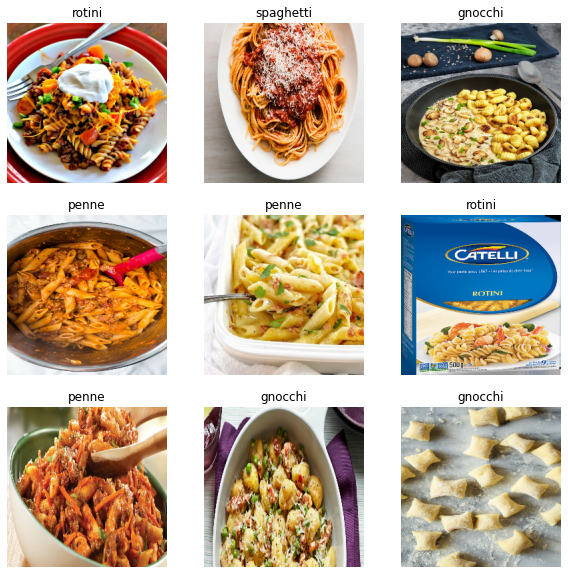

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")